# Titanic Disaster
## by Javier Alonso

## Preliminary Wrangling




In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

### GATHERING DATA

>In this section I will gather data from both files available

In [2]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

>I concatenate both dataframes for having the complete view

In [3]:
df = pd.concat([train, test], sort=False)

> For checking it has been imported correctly I do some visualization of data

In [4]:
train.shape, test.shape, df.shape

((891, 12), (418, 11), (1309, 12))

> Train and df has one more column because it has de "survived" data, not available in test. In the df dataframe the survived of test data has a NaN

> I´m going to analyze the big dataframe

In [5]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
df.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
504,505,1.0,1,"Maioni, Miss. Roberta",female,16.0,0,0,110152,86.5000,B79,S
280,1172,NaN,3,"Oreskovic, Miss. Jelka",female,23.0,0,0,315085,8.6625,NaN,S
517,518,0.0,3,"Ryan, Mr. Patrick",male,NaN,0,0,371110,24.1500,NaN,Q
119,120,0.0,3,"Andersson, Miss. Ellis Anna Maria",female,2.0,4,2,347082,31.2750,NaN,S
361,1253,NaN,2,"Mallet, Mrs. Albert (Antoinette Magnin)",female,24.0,1,1,S.C./PARIS 2079,37.0042,NaN,C


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
PassengerId    1309 non-null int64
Survived       891 non-null float64
Pclass         1309 non-null int64
Name           1309 non-null object
Sex            1309 non-null object
Age            1046 non-null float64
SibSp          1309 non-null int64
Parch          1309 non-null int64
Ticket         1309 non-null object
Fare           1308 non-null float64
Cabin          295 non-null object
Embarked       1307 non-null object
dtypes: float64(3), int64(4), object(5)
memory usage: 132.9+ KB


## ASESSING AND CLEANING DATA

> After gathering gathering and do the concat of the data, I´ve assessed it visually and programmatically for quality and tidiness issues, and clean the issues

> First thing I do a copy of my dataframe


In [214]:
df_clean = df.copy()

### Incorrect Datatypes

> 1.- incorrect datatype of the field: Survived, but as it has NaN values can´t be changed to integer.


In [215]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
PassengerId    1309 non-null int64
Survived       891 non-null float64
Pclass         1309 non-null int64
Name           1309 non-null object
Sex            1309 non-null object
Age            1046 non-null float64
SibSp          1309 non-null int64
Parch          1309 non-null int64
Ticket         1309 non-null object
Fare           1308 non-null float64
Cabin          295 non-null object
Embarked       1307 non-null object
dtypes: float64(3), int64(4), object(5)
memory usage: 132.9+ KB


> 2.- incorrect datatype of the column Pclass: it should be a string. We change the datatype

In [216]:
df_clean.Pclass = df_clean.Pclass.astype(str)

In [217]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
PassengerId    1309 non-null int64
Survived       891 non-null float64
Pclass         1309 non-null object
Name           1309 non-null object
Sex            1309 non-null object
Age            1046 non-null float64
SibSp          1309 non-null int64
Parch          1309 non-null int64
Ticket         1309 non-null object
Fare           1308 non-null float64
Cabin          295 non-null object
Embarked       1307 non-null object
dtypes: float64(3), int64(3), object(6)
memory usage: 132.9+ KB


### Null Values

> NaN values in Survived, Age (20%), Fare (1 value), Cabin(77% of values) and Embarked (2 values) column. 

> The Survived column doesn´t count as it´s the result variable. We have to see how to fix the other variables

In [218]:
df_clean.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [219]:
df_clean.isnull().sum()/df_clean.shape[0]

PassengerId    0.000000
Survived       0.319328
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.200917
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000764
Cabin          0.774637
Embarked       0.001528
dtype: float64

> **1- NaN values in Age column**

In [220]:
df_clean.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


> Solution: there are many options for replacing the null values. Next a few:

> - Replace with the total mean or median of the age
> - Replace with the mean or median of the age of the sex of the passenger
> - Replace with the mean or median of the age of the Pclass of the passenger

> But I think there´s a better option. From the name we can extract the title (Mr, Mrs, Miss,...) and get the mean or the median of the age of the group, so the new age will be more precise

> First I extract the title


In [221]:
#I extract the title
df_clean['Title'] = df_clean.Name.str.split(",", expand = True)[1].str.split(".", expand = True)[0].str.strip()

#I fix the titles asigned incorrectly, leaving only Mr, Miss, Mrs, Master
df_clean.loc[(df_clean.Title == "Dr") & (df_clean.Sex == "male"),"Title"] = "Mr"
df_clean.loc[(df_clean.Title == "Dr") & (df_clean.Sex == "female"),"Title"] = "Mrs"
df_clean.loc[(df_clean.Title.isin(["Rev","Col","Major","Jonkheer","Capt","Sir","Don"]) ),"Title"] = "Mr"
df_clean.loc[(df_clean.Title.isin(["Mlle","Mme","Dona","Lady","the Countess","Ms"]) ),"Title"] = "Mrs"

In [222]:
df_clean.Title.value_counts(dropna = False)

Mr        782
Miss      260
Mrs       206
Master     61
Name: Title, dtype: int64

> I get the mean and median for each of the titles

In [223]:
#create a df with the mean and median per title
Title_age = df_clean.groupby('Title').agg({"mean","median" })['Age'].reset_index()

#function for asigning the mean per title to the ages of -1
def mean_age(age, title):
    if age == -1:
        age_mean = round(Title_age[Title_age.Title == title]['mean'].iloc[0],2)
    else:
        age_mean = age
    return age_mean

#I asing -1 to the NaN
df_clean['Age'].fillna(-1, inplace=True)
#I replace the -1 with the mean of the title
df_clean['Age'] = df_clean.apply(lambda x: mean_age(x['Age'],x['Title']),axis=1)

In [224]:
df_clean.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age               0
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
Title             0
dtype: int64

> **2 NaN in Fare column**. There´s only one value with NaN. The Fare is related to the Pclass, so I´m going to replace the NaN with the mean of its Pclass (3)

In [225]:
class_fare = df_clean.groupby('Pclass').agg({"mean"})['Fare'].reset_index()
class_3_fare = round(class_fare[class_fare['Pclass'] == '3']['mean'].iloc[0],4)
df_clean.Fare.loc[df_clean.PassengerId == 1044] = class_3_fare

In [226]:
df_clean.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age               0
SibSp             0
Parch             0
Ticket            0
Fare              0
Cabin          1014
Embarked          2
Title             0
dtype: int64

> **3 NaN in Cabin column**. It has with NaN´s 77% of the values of the column, so it´s impossible to get good values for it. I´m going to delete this column as it doesn´t give us quality information

In [227]:
df_clean.isnull().sum()/df_clean.shape[0]

PassengerId    0.000000
Survived       0.319328
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.000000
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.774637
Embarked       0.001528
Title          0.000000
dtype: float64

In [228]:
df_clean = df_clean.drop('Cabin', axis=1)

In [229]:
df_clean.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Mr
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,Mrs
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Miss
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,Mrs
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,Mr


> **4 NaN in Embarked column**. There are only two people with this column in blank. Being a text column I´m going to replace the values with the mode

In [230]:
df_clean[df_clean.Embarked.isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
61,62,1.0,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,NaN,Miss
829,830,1.0,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,NaN,Mrs


In [231]:
df_clean.Embarked.value_counts(dropna = False)

S      914
C      270
Q      123
NaN      2
Name: Embarked, dtype: int64

In [232]:
df_clean.Embarked.loc[df_clean.PassengerId.isin(['62','830'])] = df_clean.Embarked.mode().iloc[0]

In [233]:
df_clean.Embarked.value_counts(dropna = False)

S    916
C    270
Q    123
Name: Embarked, dtype: int64

> Now we can see there are only NaNs in the variable to predict

In [234]:
df_clean.isnull().sum()/df_clean.shape[0]

PassengerId    0.000000
Survived       0.319328
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.000000
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Embarked       0.000000
Title          0.000000
dtype: float64

### Redundant columns

> There are columns that are not useful for our analysis.

> The Ticket is unique for each passenger, and the valid identifier will be the Passengerid

> The Name is unique for each passenger, and the valid identifier will be the Passengerid

> These two columns are redundant, but we´ll keep the information about each client in a separate dataframe.


In [235]:
df_clean.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Mr
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,Mrs
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Miss
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,Mrs
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,Mr


In [236]:
passengers = df_clean.copy()
passengers = passengers.drop(['Survived','Pclass','Sex', 'Age','SibSp','Parch','Fare','Embarked','Title'], axis=1)
df_clean = df_clean.drop(['Name','Ticket'], axis=1)

In [237]:
df_clean.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0.0,3,male,22.0,1,0,7.2500,S,Mr
1,2,1.0,1,female,38.0,1,0,71.2833,C,Mrs
2,3,1.0,3,female,26.0,0,0,7.9250,S,Miss
3,4,1.0,1,female,35.0,1,0,53.1000,S,Mrs
4,5,0.0,3,male,35.0,0,0,8.0500,S,Mr


In [238]:
passengers.head()

,PassengerId,Name,Ticket
0,1,"Braund, Mr. Owen Harris",A/5 21171
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",PC 17599
2,3,"Heikkinen, Miss. Laina",STON/O2. 3101282
3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",113803
4,5,"Allen, Mr. William Henry",373450


### Categorization of column Age

> I´m going to categorize the column Age. Let´s see first how it is distributed

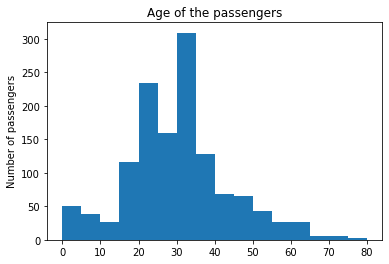

In [239]:
bin_edges = np.arange(0, df_clean['Age'].max()+5, 5)
plt.hist(data = df_clean, x = 'Age', bins = bin_edges);
plt.title('Age of the passengers');
plt.ylabel('Number of passengers');

> There are three great blocks: children (0 to 15 years old), Young (15 to 40), Adults (40-50), Old(>50). I´m going to create a new column with this categories

In [240]:
def age_cat(age):
    if age <=15:
        cat_age = 'Child'
    elif ((age > 15) & (age <=40)):
        cat_age = 'Young'
    elif ((age > 40) & (age <=50)):
        cat_age = 'Adult'
    elif age > 50:
        cat_age = 'Old'
    return cat_age

#I replace the -1 with the mean of the title
df_clean['Age_Cat'] = df_clean.apply(lambda x: age_cat(x['Age']),axis=1)

#Drop Age column
df_clean = df_clean.drop('Age', axis=1)

In [241]:
df_clean.head()

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked,Title,Age_Cat
0,1,0.0,3,male,1,0,7.2500,S,Mr,Young
1,2,1.0,1,female,1,0,71.2833,C,Mrs,Young
2,3,1.0,3,female,0,0,7.9250,S,Miss,Young
3,4,1.0,1,female,1,0,53.1000,S,Mrs,Young
4,5,0.0,3,male,0,0,8.0500,S,Mr,Young


In [242]:
df_clean.Age_Cat.value_counts()

Young    959
Adult    132
Child    123
Old       95
Name: Age_Cat, dtype: int64

### Categorization of column Fare

> I´m going to categorize the column Fare. Let´s see first how it is distributed

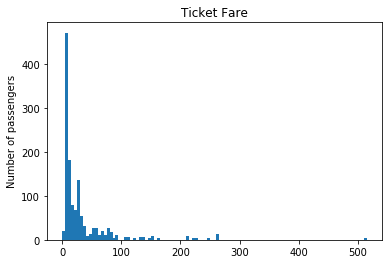

In [243]:
bin_edges = np.arange(0, df_clean['Fare'].max()+5, 5)
plt.hist(data = df_clean, x = 'Fare', bins = bin_edges);
plt.title('Ticket Fare');
plt.ylabel('Number of passengers');

> Let´s zoom it

(0, 100)

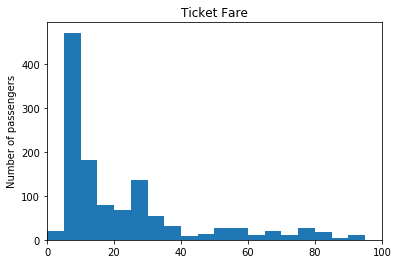

In [244]:
bin_edges = np.arange(0, df_clean['Fare'].max()+5, 5)
plt.hist(data = df_clean, x = 'Fare', bins = bin_edges);
plt.title('Ticket Fare');
plt.ylabel('Number of passengers');
plt.xlim(0,100)

> There are three great blocks: low (0 to 15), mid (15 to 40), high (>40-50). I´m going to create a new column with this categories

In [245]:
def fare_cat(fare):
    cat_fare = 'None'
    if fare <=15:
        cat_fare = 'Low'
    elif ((fare > 15) & (fare <=40)):
        cat_fare = 'Mid'
    elif fare > 40:
        cat_fare = 'High'
    return cat_fare


df_clean['Fare_Cat'] = df_clean.apply(lambda x: fare_cat(x['Fare']),axis=1)

#Drop Fare column
df_clean = df_clean.drop('Fare', axis=1)

In [246]:
df_clean.head()

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Embarked,Title,Age_Cat,Fare_Cat
0,1,0.0,3,male,1,0,S,Mr,Young,Low
1,2,1.0,1,female,1,0,C,Mrs,Young,High
2,3,1.0,3,female,0,0,S,Miss,Young,Low
3,4,1.0,1,female,1,0,S,Mrs,Young,High
4,5,0.0,3,male,0,0,S,Mr,Young,Low


In [247]:
df_clean.Fare_Cat.value_counts()

Low     674
Mid     371
High    264
Name: Fare_Cat, dtype: int64

### Categorization of column SibSp

> I´m going to categorize the column SibSp of number of Sibilings/Spouses as I think what affects to survive or not is to have Sibilings or Spouses but not how many

In [393]:
def sibsp_cat(n_sibsp):
    if n_sibsp == 0:
        sibsp = 0
    else:
        sibsp = 1
    return sibsp

#I replace the -1 with the mean of the title
df_clean['Sibsp_Cat'] = df_clean.apply(lambda x: sibsp_cat(x['SibSp']),axis=1)

#Drop Age column
df_clean = df_clean.drop('SibSp', axis=1)

In [394]:
df_clean.head()

,PassengerId,Survived,Pclass,Sex,Parch,Embarked,Title,Age_Cat,Fare_Cat,Sibsp_Cat
0,1,0.0,3,male,0,S,Mr,Young,Low,1
1,2,1.0,1,female,0,C,Mrs,Young,High,1
2,3,1.0,3,female,0,S,Miss,Young,Low,0
3,4,1.0,1,female,0,S,Mrs,Young,High,1
4,5,0.0,3,male,0,S,Mr,Young,Low,0


### Categorization of column Parch

> I´m going to categorize the column Parch of number of Children / Parents as I think what affects to survive or not is to have Sibilings or Spouses but not how many

In [401]:
def parch_cat(n_parch):
    if n_parch == 0:
        parch = 0
    else:
        parch = 1
    return parch

#I replace the -1 with the mean of the title
df_clean['Parch_Cat'] = df_clean.apply(lambda x: sibsp_cat(x['Parch']),axis=1)

#Drop Age column
df_clean = df_clean.drop('Parch', axis=1)

In [402]:
df_clean.head()

,PassengerId,Survived,Pclass,Sex,Embarked,Title,Age_Cat,Fare_Cat,Sibsp_Cat,Parch_Cat
0,1,0.0,3,male,S,Mr,Young,Low,1,0
1,2,1.0,1,female,C,Mrs,Young,High,1,0
2,3,1.0,3,female,S,Miss,Young,Low,0,0
3,4,1.0,1,female,S,Mrs,Young,High,1,0
4,5,0.0,3,male,S,Mr,Young,Low,0,0


### Consolidation of dataframes

> In this section I´m going to consolidate both dataframes into files, that I´ll read for the next sections

In [403]:
df_clean.to_csv('Titanic_info.csv', index = False)
passengers.to_csv('Titanic_pass_info.csv', index = False)

# Exploratory Data Analysis (EDA)

> In this section, I´ll investigate the distributions variables in the big dataframe. 

> I won´t investigate the columns of passenger id, as it is just an identifier, and its value in a univariate exploration doesn´t make sense, and I won´t either investigate the Survived column as it´s incomplete

> First I´ll import the data stored previously in files

In [404]:
df_tit = pd.read_csv('Titanic_info.csv')
df_pass = pd.read_csv('Titanic_pass_info.csv')

In [405]:
df_tit.head()

,PassengerId,Survived,Pclass,Sex,Embarked,Title,Age_Cat,Fare_Cat,Sibsp_Cat,Parch_Cat
0,1,0.0,3,male,S,Mr,Young,Low,1,0
1,2,1.0,1,female,C,Mrs,Young,High,1,0
2,3,1.0,3,female,S,Miss,Young,Low,0,0
3,4,1.0,1,female,S,Mrs,Young,High,1,0
4,5,0.0,3,male,S,Mr,Young,Low,0,0


In [413]:
#due to importing issues I´ve to change the datatype of Pclass
df_tit.Pclass = df_tit.Pclass.astype(str)
df_tit.Sibsp_Cat = df_tit.Sibsp_Cat.astype(str)
df_tit.Parch_Cat = df_tit.Parch_Cat.astype(str)

In [407]:
df_tit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 10 columns):
PassengerId    1309 non-null int64
Survived       891 non-null float64
Pclass         1309 non-null object
Sex            1309 non-null object
Embarked       1309 non-null object
Title          1309 non-null object
Age_Cat        1309 non-null object
Fare_Cat       1309 non-null object
Sibsp_Cat      1309 non-null int64
Parch_Cat      1309 non-null int64
dtypes: float64(1), int64(3), object(6)
memory usage: 102.4+ KB


In [408]:
df_pass.head()

,PassengerId,Name,Ticket
0,1,"Braund, Mr. Owen Harris",A/5 21171
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",PC 17599
2,3,"Heikkinen, Miss. Laina",STON/O2. 3101282
3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",113803
4,5,"Allen, Mr. William Henry",373450


In [409]:
df_pass.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 3 columns):
PassengerId    1309 non-null int64
Name           1309 non-null object
Ticket         1309 non-null object
dtypes: int64(1), object(2)
memory usage: 30.8+ KB


In [410]:
#creation of a function for plotting the text columns
def graph_1(title, data, field, rot):
    # create the plot
    base_color = sb.color_palette()[0]
    sb.countplot(data = data, x = field, color = base_color)
    plt.xlabel('')
    plt.ylabel('Number of passengers')


    # add annotations
    n_points = data[field].count()
    cat_counts = data[field].value_counts()
    locs, labels = plt.xticks() # get the current tick locations and labels

    # loop through each pair of locations and labels
    for loc, label in zip(locs, labels):

        # get the text property for the label to get the correct count
        count = cat_counts[label.get_text()]
        pct_string = '{:0.1f}%'.format(100*count/n_points)

        # print the annotation just below the top of the bar
        plt.text(loc, 5, pct_string, ha = 'center', color = 'k')
    plt.xticks(rotation = rot);
    plt.title(title);

## Passengers Characteristics

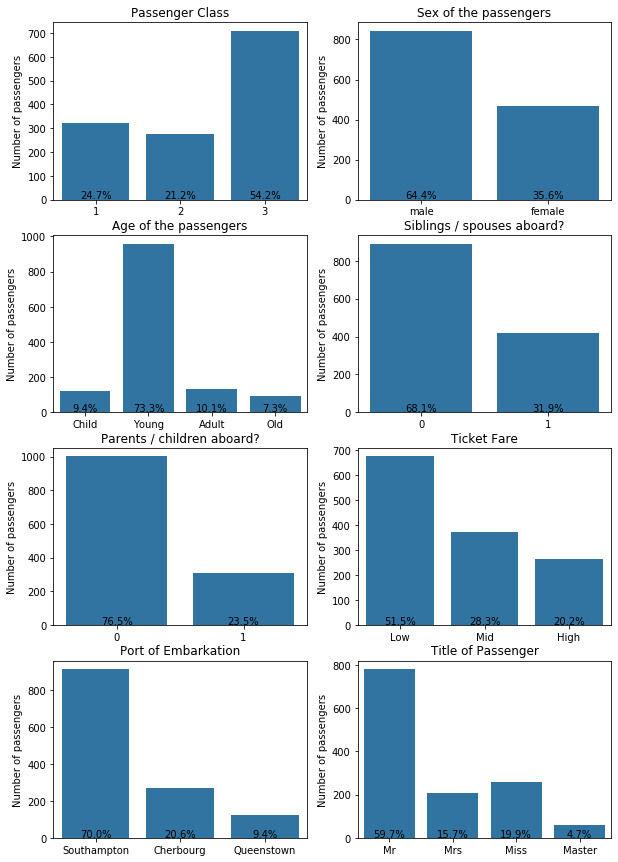

In [415]:
plt.figure(figsize = [10, 15])


plt.subplot(4, 2, 1)
graph_1('Passenger Class', df_tit,'Pclass',0)

plt.subplot(4, 2, 2)
graph_1('Sex of the passengers', df_tit,'Sex',0)

plt.subplot(4, 2, 3)
level_order = ['Child', 'Young', 'Adult', 'Old']
ordered_cat = pd.api.types.CategoricalDtype(ordered = True, categories = level_order)
df_tit['Age_Cat'] = df_tit['Age_Cat'].astype(ordered_cat)

graph_1('Age of the passengers', df_tit,'Age_Cat',0)

plt.subplot(4, 2, 4)
graph_1('Siblings / spouses aboard?', df_tit,'Sibsp_Cat',0)

plt.subplot(4, 2, 5)
graph_1('Parents / children aboard?', df_tit,'Parch_Cat',0)

plt.subplot(4, 2, 6)
level_order = ['Low', 'Mid', 'High']
ordered_cat = pd.api.types.CategoricalDtype(ordered = True, categories = level_order)
df_tit['Fare_Cat'] = df_tit['Fare_Cat'].astype(ordered_cat)

graph_1('Ticket Fare', df_tit,'Fare_Cat',0)

plt.subplot(4, 2, 7)
graph_1('Port of Embarkation', df_tit,'Embarked',0)
plt.xticks([0, 1, 2], ['Southampton', 'Cherbourg', 'Queenstown']);

plt.subplot(4, 2, 8)
graph_1('Title of Passenger', df_tit,'Title',0)

> We can see that most of the passengers embarked in Southampton and they are young males (between 15 and 40 years old) travelling on their own (no sibilings, spouses, parents or children on board) who paid a low fare ticket in Class 3

## Survival Characteristics

As this is a Kaggle competition we don´t know the target value for all data so we will infer through different probabilities who survived and not, but only from the train data. This data will be used for getting a machine learning algorith for predicting the test values

I´ll show the probability of survival depending on different characteristics of passengers, so we´ll know what are the features that affect most for survive

In [416]:
#create the dataframe of the passengers we have the data of survivor or not
df_surv = df_tit[df_tit.Survived> -1]
n_pass = len(df_surv)

>**CLASS VS SURVIVOR**

In [356]:
Pr_cl1_Surv = round(len(df_surv[(df_surv.Pclass == '1') & (df_surv.Survived == 1)])/ len(df_surv[df_surv.Pclass == '1']),3)
Pr_cl2_Surv = round(len(df_surv[(df_surv.Pclass == '2') & (df_surv.Survived == 1)])/ len(df_surv[df_surv.Pclass == '2']),3)
Pr_cl3_Surv = round(len(df_surv[(df_surv.Pclass == '3') & (df_surv.Survived == 1)])/ len(df_surv[df_surv.Pclass == '3']),3)

data = {'Class':  ['1', '2','3'],
        'Rate_Survivors': [Pr_cl1_Surv, Pr_cl2_Surv,Pr_cl3_Surv]}
df_cl_surv = pd.DataFrame (data, columns = ['Class','Rate_Survivors'])

print("Passengers Class")
print("To be in Class 1  gave a probability of survivor of", Pr_cl1_Surv)
print("To be in Class 2  gave a probability of survivor of", Pr_cl2_Surv)
print("To be in Class 3  gave a probability of survivor of", Pr_cl3_Surv)

Passengers Class
To be in Class 1  gave a probability of survivor of 0.63
To be in Class 2  gave a probability of survivor of 0.473
To be in Class 3  gave a probability of survivor of 0.242


**SEX VS SURVIVOR**

In [380]:
Pr_male_Surv = round(len(df_surv[(df_surv.Sex == 'male') & (df_surv.Survived == 1)])/ len(df_surv[df_surv.Sex == 'male']),2)
Pr_female_Surv = round(len(df_surv[(df_surv.Sex == 'female') & (df_surv.Survived == 1)])/ len(df_surv[df_surv.Sex == 'female']),2)

data = {'Sex':  ['Male', 'Female'],
        'Rate_Survivors': [Pr_male_Surv, Pr_female_Surv]}
df_sex_surv = pd.DataFrame (data, columns = ['Sex','Rate_Survivors'])

print("Passengers Sex")
print("Being male gave a probability of survivor of", Pr_male_Surv)
print("Being female gave a probability of survivor of", Pr_female_Surv)

Passengers Sex
Being male gave a probability of survivor of 0.19
Being female gave a probability of survivor of 0.74


In [417]:
df_surv.head()

,PassengerId,Survived,Pclass,Sex,Embarked,Title,Age_Cat,Fare_Cat,Sibsp_Cat,Parch_Cat
0,1,0.0,3,male,S,Mr,Young,Low,1,0
1,2,1.0,1,female,C,Mrs,Young,High,1,0
2,3,1.0,3,female,S,Miss,Young,Low,0,0
3,4,1.0,1,female,S,Mrs,Young,High,1,0
4,5,0.0,3,male,S,Mr,Young,Low,0,0


> **SIBILINGS /SPOUSES VS SURVIVOR**

In [422]:
Pr_sbsp0_Surv = round(len(df_surv[(df_surv.Sibsp_Cat == '0') & (df_surv.Survived == 1)])/ len(df_surv[df_surv.Sibsp_Cat == '0']),2)
Pr_sbsp1_Surv = round(len(df_surv[(df_surv.Sibsp_Cat == '1') & (df_surv.Survived == 1)])/ len(df_surv[df_surv.Sibsp_Cat == '1']),2)

data = {'SbSp':  ['0', '1'],
        'Rate_Survivors': [Pr_sbsp0_Surv, Pr_sbsp1_Surv]}
df_surv_SibSp = pd.DataFrame (data, columns = ['SbSp','Rate_Survivors'])


print("Sibilings / Spouses of Passengers")
print("Not having sibilings or spouses on board gave a probability of survivor of", Pr_sbsp0_Surv)
print("Having sibilings or spouses on board gave a probability of survivor of", Pr_sbsp1_Surv)


Sibilings / Spouses of Passengers
Not having sibilings or spouses on board gave a probability of survivor of 0.35
Having sibilings or spouses on board gave a probability of survivor of 0.47


> **PARENTS / CHILDREN ONBOARD VS SURVIVOR**

In [424]:
Pr_Parch0_Surv = round(len(df_surv[(df_surv.Parch_Cat == '0') & (df_surv.Survived == 1)])/ len(df_surv[df_surv.Parch_Cat == '0']),2)
Pr_Parch1_Surv = round(len(df_surv[(df_surv.Parch_Cat == '1') & (df_surv.Survived == 1)])/ len(df_surv[df_surv.Parch_Cat == '1']),2)

data = {'Parch':  ['0', '1'],
        'Rate_Survivors': [Pr_Parch0_Surv, Pr_Parch1_Surv]}
df_surv_Parch = pd.DataFrame (data, columns = ['Parch','Rate_Survivors'])


print("Parents / Children of Passengers")
print("Not having parents or children on board gave a probability of survivor of", Pr_Parch0_Surv)
print("Not having parents or children on board gave a probability of survivor of", Pr_Parch1_Surv)


Parents / Children of Passengers
Not having parents or children on board gave a probability of survivor of 0.34
Not having parents or children on board gave a probability of survivor of 0.51


> **PORT OF EMBARKMENT VS SURVIVOR**

In [383]:
#I calculate the probabilitis of the Port of Embarkment
Pr_EmbS_Surv = round(len(df_surv[(df_surv.Embarked == 'S') & (df_surv.Survived == 1)])/ len(df_surv[df_surv.Embarked == 'S']),2)
Pr_EmbC_Surv = round(len(df_surv[(df_surv.Embarked == 'C') & (df_surv.Survived == 1)])/ len(df_surv[df_surv.Embarked == 'C']),2)
Pr_EmbQ_Surv = round(len(df_surv[(df_surv.Embarked == 'Q') & (df_surv.Survived == 1)])/ len(df_surv[df_surv.Embarked == 'Q']),2)

data = {'Port':  ['Southampton', 'Cherbourg', 'Queenstown'],
        'Rate_Survivors': [Pr_EmbS_Surv, Pr_EmbC_Surv, Pr_EmbQ_Surv]}
df_surv_Emb = pd.DataFrame (data, columns = ['Port','Rate_Survivors'])


print("Port of embarkment of Passengers")
print("Embarking in Southampton gave a probability of survivor of", Pr_EmbS_Surv)
print("Embarking in Cherbourg gave a probability of survivor of", Pr_EmbC_Surv)
print("Embarking in Queenstown gave a probability of survivor of", Pr_EmbQ_Surv)


Port of embarkment of Passengers
Embarking in Southampton gave a probability of survivor of 0.34
Embarking in Cherbourg gave a probability of survivor of 0.55
Embarking in Queenstown gave a probability of survivor of 0.39


> **TITLE VS SURVIVOR**

In [384]:
Pr_TitMr_Surv = round(len(df_surv[(df_surv.Title == 'Mr') & (df_surv.Survived == 1)])/ len(df_surv[df_surv.Title == 'Mr']),2)
Pr_TitMiss_Surv = round(len(df_surv[(df_surv.Title == 'Miss') & (df_surv.Survived == 1)])/ len(df_surv[df_surv.Title == 'Miss']),2)
Pr_TitMrs_Surv = round(len(df_surv[(df_surv.Title == 'Mrs') & (df_surv.Survived == 1)])/ len(df_surv[df_surv.Title == 'Mrs']),2)
Pr_TitMast_Surv = round(len(df_surv[(df_surv.Title == 'Master') & (df_surv.Survived == 1)])/ len(df_surv[df_surv.Title == 'Master']),2)

data = {'Title':  ['Mr', 'Miss', 'Mrs', 'Master'],
        'Rate_Survivors': [Pr_TitMr_Surv, Pr_TitMiss_Surv,Pr_TitMrs_Surv,Pr_TitMast_Surv]}
df_surv_Tit = pd.DataFrame (data, columns = ['Title','Rate_Survivors'])


print("Title of Passengers")
print("Being Mr gave a probability of survivor of", Pr_TitMr_Surv)
print("Being Miss gave a probability of survivor of", Pr_TitMiss_Surv)
print("Being Mrs gave a probability of survivor of", Pr_TitMrs_Surv)
print("Being Master gave a probability of survivor of", Pr_TitMast_Surv)



Title of Passengers
Being Mr gave a probability of survivor of 0.16
Being Miss gave a probability of survivor of 0.7
Being Mrs gave a probability of survivor of 0.8
Being Master gave a probability of survivor of 0.57


> **AGE VS SURVIVOR**

In [385]:
Pr_AgeC_Surv = round(len(df_surv[(df_surv.Age_Cat == 'Child') & (df_surv.Survived == 1)])/ len(df_surv[df_surv.Age_Cat == 'Child']),2)
Pr_AgeY_Surv = round(len(df_surv[(df_surv.Age_Cat == 'Young') & (df_surv.Survived == 1)])/ len(df_surv[df_surv.Age_Cat == 'Young']),2)
Pr_AgeA_Surv = round(len(df_surv[(df_surv.Age_Cat == 'Adult') & (df_surv.Survived == 1)])/ len(df_surv[df_surv.Age_Cat == 'Adult']),2)
Pr_AgeO_Surv = round(len(df_surv[(df_surv.Age_Cat == 'Old') & (df_surv.Survived == 1)])/ len(df_surv[df_surv.Age_Cat == 'Old']),2)

data = {'Age':  ['Child', 'Young', 'Adult', 'Old'],
        'Rate_Survivors': [Pr_AgeC_Surv, Pr_AgeY_Surv, Pr_AgeA_Surv, Pr_AgeO_Surv ]}
df_surv_Age = pd.DataFrame (data, columns = ['Age','Rate_Survivors'])

print("Age of Passengers")
print("Being a Child gave a probability of survivor of", Pr_AgeC_Surv)
print("Being young gave a probability of survivor of", Pr_AgeY_Surv)
print("Being an adult gave a probability of survivor of", Pr_AgeA_Surv)
print("Being old gave a probability of survivor of", Pr_AgeO_Surv)

Age of Passengers
Being a Child gave a probability of survivor of 0.59
Being young gave a probability of survivor of 0.36
Being an adult gave a probability of survivor of 0.38
Being old gave a probability of survivor of 0.34


> **FARE VS SURVIVOR**

In [386]:
Pr_FareL_Surv = round(len(df_surv[(df_surv.Fare_Cat == 'Low') & (df_surv.Survived == 1)])/ len(df_surv[df_surv.Fare_Cat == 'Low']),2)
Pr_FareM_Surv = round(len(df_surv[(df_surv.Fare_Cat == 'Mid') & (df_surv.Survived == 1)])/ len(df_surv[df_surv.Fare_Cat == 'Mid']),2)
Pr_FareH_Surv = round(len(df_surv[(df_surv.Fare_Cat == 'High') & (df_surv.Survived == 1)])/ len(df_surv[df_surv.Fare_Cat == 'High']),2)

data = {'Fare':  ['Low', 'Mid', 'High'],
        'Rate_Survivors': [Pr_FareL_Surv, Pr_FareM_Surv, Pr_FareH_Surv ]}
df_surv_Fare = pd.DataFrame (data, columns = ['Fare','Rate_Survivors'])

print("Ticket Fare")
print("Having a low ticket fare gave a probability of survivor of", Pr_FareL_Surv)
print("Having a mid ticket fare gave a probability of survivor of", Pr_FareM_Surv)
print("Having a high ticket fare gave a probability of survivor of", Pr_FareH_Surv)

Ticket Fare
Having a low ticket fare gave a probability of survivor of 0.25
Having a mid ticket fare gave a probability of survivor of 0.45
Having a high ticket fare gave a probability of survivor of 0.64


> **VISUAL REPRESENTATION**

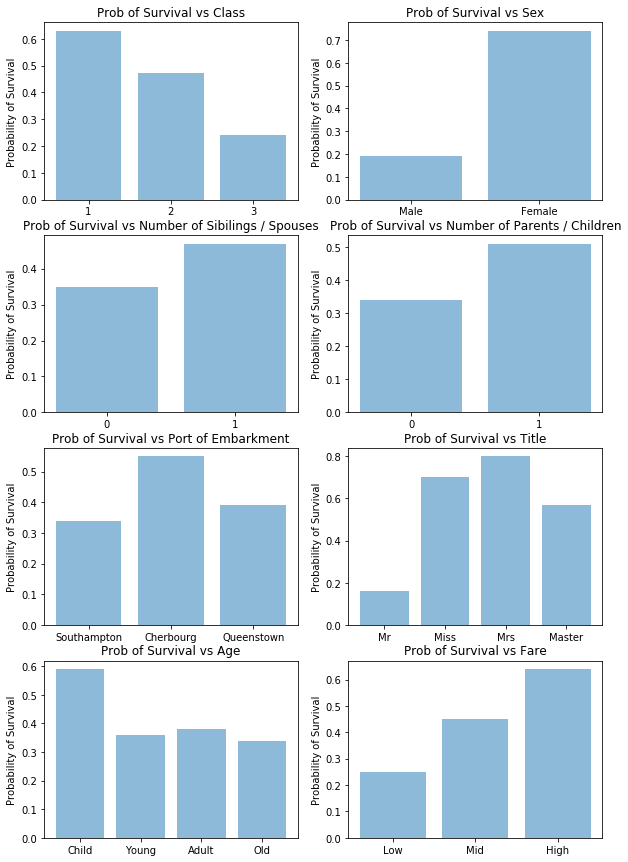

In [426]:
plt.figure(figsize = [10, 15])

#Class
plt.subplot(4, 2, 1)
objects = ('1', '2', '3')
y_pos = np.arange(len(objects))
plt.bar(y_pos, df_cl_surv.Rate_Survivors, align='center', alpha=0.5)
plt.xticks(y_pos, objects);
plt.ylabel('Probability of Survival')
plt.title('Prob of Survival vs Class');

#Sex
plt.subplot(4, 2, 2)
objects = ('Male', 'Female')
y_pos = np.arange(len(objects))
plt.bar(y_pos, df_sex_surv.Rate_Survivors, align='center', alpha=0.5)
plt.xticks(y_pos, objects);
plt.ylabel('Probability of Survival')
plt.title('Prob of Survival vs Sex');

#Sibilings / Spouses
plt.subplot(4, 2, 3)
objects = ('0', '1')
y_pos = np.arange(len(objects))
plt.bar(y_pos, df_surv_SibSp.Rate_Survivors, align='center', alpha=0.5)
plt.xticks(y_pos, objects);
plt.ylabel('Probability of Survival')
plt.title('Prob of Survival vs Number of Sibilings / Spouses');

#parents/children
plt.subplot(4, 2, 4)
objects = ('0', '1')
y_pos = np.arange(len(objects))
plt.bar(y_pos, df_surv_Parch.Rate_Survivors, align='center', alpha=0.5)
plt.xticks(y_pos, objects);
plt.ylabel('Probability of Survival')
plt.title('Prob of Survival vs Number of Parents / Children');

#port of embarkment
plt.subplot(4, 2, 5)
objects = ('Southampton', 'Cherbourg', 'Queenstown')
y_pos = np.arange(len(objects))
plt.bar(y_pos, df_surv_Emb.Rate_Survivors, align='center', alpha=0.5)
plt.xticks(y_pos, objects);
plt.ylabel('Probability of Survival')
plt.title('Prob of Survival vs Port of Embarkment');

#Title
plt.subplot(4, 2, 6)
objects = ('Mr', 'Miss', 'Mrs', 'Master')
y_pos = np.arange(len(objects))
plt.bar(y_pos, df_surv_Tit.Rate_Survivors, align='center', alpha=0.5)
plt.xticks(y_pos, objects);
plt.ylabel('Probability of Survival')
plt.title('Prob of Survival vs Title');

#Age
plt.subplot(4, 2, 7)
objects = ('Child', 'Young', 'Adult', 'Old')
y_pos = np.arange(len(objects))
plt.bar(y_pos, df_surv_Age.Rate_Survivors, align='center', alpha=0.5)
plt.xticks(y_pos, objects);
plt.ylabel('Probability of Survival')
plt.title('Prob of Survival vs Age');

#Fare
plt.subplot(4, 2, 8)
objects = ('Low', 'Mid', 'High')
y_pos = np.arange(len(objects))
plt.bar(y_pos, df_surv_Fare.Rate_Survivors, align='center', alpha=0.5)
plt.xticks(y_pos, objects);
plt.ylabel('Probability of Survival')
plt.title('Prob of Survival vs Fare');

> Assesing the graphs we can see that the features that affects more to survive is to be rich (class and Fare), to be a child and to be a female. It also have inffluence to have relatives with you. All these conclussions seem very logical

> Embarking in Cherbourg seems that also has effects but really doesn´t have too much logic, probably it´s related to side effects, like that in that port embarked more women, children, rich people or families